In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
true = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/realtweetsfinal.csv')
false = pd.read_csv('/content/drive/My Drive/Internship/Scrapped Data/faketweetsfinal.csv')

In [ ]:
true['category'] = 1
false['category'] = 0

In [ ]:
df = pd.concat([true,false]) #Merging the 2 datasets

In [ ]:
df.isna().sum() # Checking for nan Values

date         0
search       0
username     0
tweet        0
nlikes       0
nretweets    0
nreplies     0
class        0
category     0
dtype: int64

In [ ]:
df.tweet.count()

80628

In [ ]:
df['tweet'] = df['tweet'] + " " + df['search']
del df['search']
del df['date']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
stemmer = PorterStemmer()
def stem_text(tweet):
    final_text = []
    for i in tweet.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)        

In [ ]:
df.tweet = df.tweet.apply(stem_text)

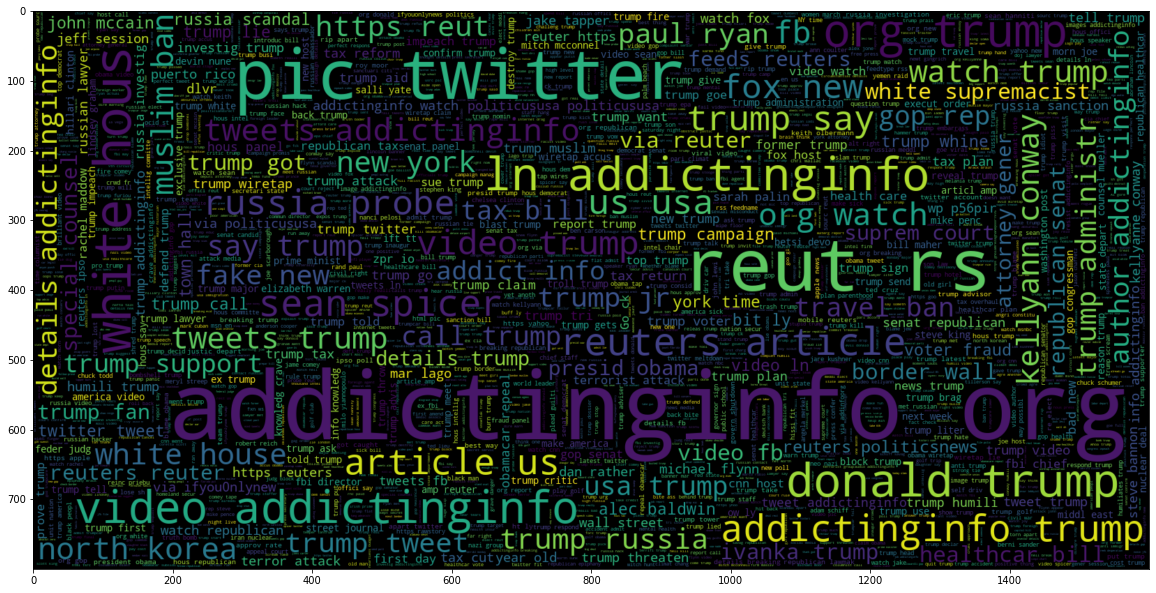

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.tweet,df.category)

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (60471, 130909)
BOW_cv_test: (20157, 130909)


In [ ]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
60471/60471 [==============================] - 347s 6ms/step - loss: 0.4977 - accuracy: 0.7725
Epoch 2/5
60471/60471 [==============================] - 341s 6ms/step - loss: 0.1881 - accuracy: 0.9421
Epoch 3/5
60471/60471 [==============================] - 338s 6ms/step - loss: 0.1830 - accuracy: 0.9424
Epoch 4/5
60471/60471 [==============================] - 335s 6ms/step - loss: 0.1829 - accuracy: 0.9424
Epoch 5/5
60471/60471 [==============================] - 334s 6ms/step - loss: 0.1827 - accuracy: 0.9424


In [ ]:
pred = model.predict(cv_test_reviews)

In [ ]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [ ]:
accuracy_score(pred,y_test)

0.7445552413553604

In [ ]:
cv_report = classification_report(y_test,pred,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     12858
           1       0.97      0.30      0.46      7299

    accuracy                           0.74     20157
   macro avg       0.84      0.65      0.65     20157
weighted avg       0.81      0.74      0.70     20157



In [ ]:
cm_cv = confusion_matrix(y_test,pred)
cm_cv

array([[12785,    73],
       [ 5076,  2223]])

In [ ]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

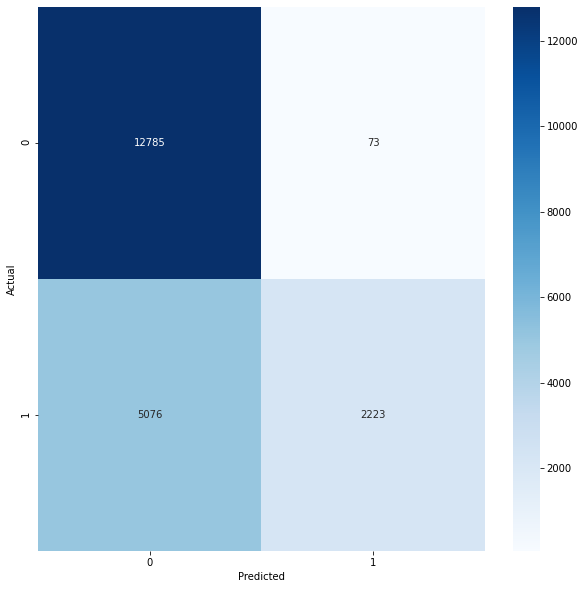

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')

In [ ]:
fake_datewise_counts = false.groupby('date').date.agg([('count', 'count')]).reset_index().sort_values(by = "count", ascending = False)

fake_datewise_counts = fake_datewise_counts.head(50)

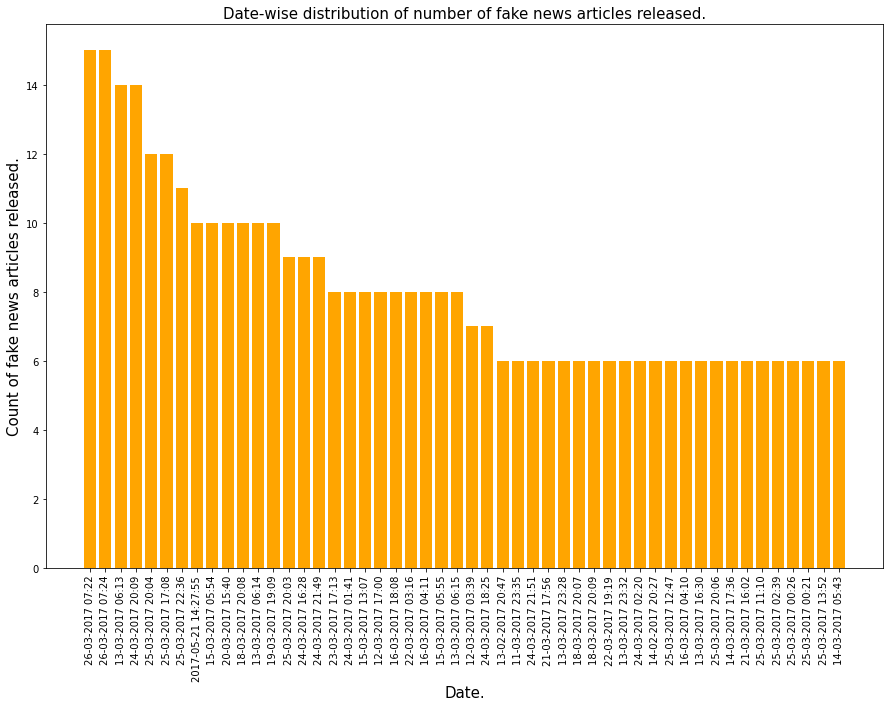

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.bar(fake_datewise_counts["date"], fake_datewise_counts["count"], align = "center", color = "orange")
plt.xlabel("Date.", fontsize = 15)
plt.ylabel("Count of fake news articles released.", fontsize = 15)
plt.title("Date-wise distribution of number of fake news articles released.", fontsize = 15)
plt.show()